### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [22]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [23]:
# Question 1: Import the datafile tw_tweets_users_media_places.csv that was 
# provided with this checkpoint. Set tweet_id as the index. Print the number 
# of records in this dataset in the output. How many records are there?

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('tw_tweets_users_media_places.csv', index_col='tweet_id')
print(len(df))

534


In [24]:
# Question 2: Make a copy of the DataFrame with all non-numeric features
# removed. Print out a list of the remaining columns in the output. Print
# the first five records of this reduced dataset.

df_copy = df.select_dtypes(np.number)
print(df_copy.columns)
df_copy.head()


Index(['context_annotations_count', 'count_annotations', 'count_cashtags',
       'count_hashtags', 'count_mentions', 'count_urls', 'likes', 'quotes',
       'referenced_tweet_count', 'replies', 'retweets', 'followers_count',
       'following_count', 'tweet_count', 'listed_count', 'height', 'width'],
      dtype='object')


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width
tweet_id,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048


In [25]:
# Question 3: Using 'retweets' as the label, create an MLR model using all
# features except 'likes', 'quotes', 'replies', and the label. These features
# each represent outcomes, or alternatives to the label 'rewteets.' If our
# plan is to use this model to predict the popularity of new potential tweets,
# then we would not know what the likes, quotes, or replies will be. Therefore,
# we will eliminate them from the model. Print out the model results summary.

y = df_copy['retweets']
X = df_copy.drop(columns=['retweets', 'likes', 'quotes', 'replies']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.81e-05
Time:                        21:47:56   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [26]:
# Question 4: Add the scored (i.e. predicted) values for every record 
# back into the original dataframe using the column label "model_1". Print
# the first five records.
df = df.assign(model_1=results.predict(X))
df.head()

,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,...,False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,6.395809
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,...,False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,2.022634
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,...,False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,5.030170
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,1.159034
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,1.159034


In [27]:
# Question 5: Calculate and/or print the following five metrics for the 
# model you ran in the prior steps: R-squared, R-squared adjusted, RMSE, 
# MAE, and mean of the label column.

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('r2: ' + str(results.rsquared))
print('r2 Adjusted: ' + str(results.rsquared_adj))
print('RMSE: ' + str(mean_squared_error(y, df.model_1, squared=False)))
print('MAE: ' + str(mean_absolute_error(y, results.predict(X))))
print('Mean: ' + str(df['retweets'].mean()))

r2: 0.07614441144416206
r2 Adjusted: 0.0548655879073674
RMSE: 18.934566285584516
MAE: 5.159386575412486
Mean: 3.900749063670412


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
def mlr_fit(results, actual):
    import numpy as np

    residuals = np.array(actual) - np.array(results.fittedvalues)
    rmse = np.sqrt(sum((residuals**2))/len(actual))

    mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))

    metrics  = "R-squared:\t" + str(round(results.rsquared, 4)) + "\n"
    metrics += "R2-adjusted:\t" + str(round(results.rsquared_adj, 4)) + "\n"
    metrics += "RMSE:\t\t" + str(round(rmse, 4)) + "\n"
    metrics += "MAE:\t\t" + str(round(mae, 4)) + "\n"
    metrics += "Label mean:\t" + str(round(np.mean(actual), 4))

    return metrics
print(mlr_fit(results, df['retweets']))

R-squared:	0.0761
R2-adjusted:	0.0549
RMSE:		18.9346
MAE:		5.1594
Label mean:	3.9007


In [29]:
# Question 6: We need to improve the model fit so that our predictions will
# be more accurate. Let's begin by incorporating the two date columns from
# the original dataset. Convert the features 'created_at_tweet' and 
# 'created_at_author' to an integer representing the number of days since
# those dates until January 1st, 2022. Do not put these values into new 
# columns. Replace the existing dates with those values. HINT: you will find
# many examples online of how to do this. But I used the strptime() method 
# of the datetime package to cast "2022-1-1" into a date, subtract the column
# value from that date, and then return the result in days (.dt.days). Print
# the first five records of this new dataset.

import datetime

d1 = datetime.datetime.strptime('2022-1-1', '%Y-%m-%d')
df['created_at_tweet'] = (d1 - pd.to_datetime(df['created_at_tweet']).dt.tz_localize(None)).dt.days
df['created_at_author'] = (d1 - pd.to_datetime(df['created_at_author']).dt.tz_localize(None)).dt.days
df.head()

,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,100,en,14,...,False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,6.395809
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,103,en,7,...,False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,2.022634
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,629,en,49,...,False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,5.030170
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,624,en,3,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,1.159034
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,627,en,15,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,1.159034


In [30]:
# Question 7: Create another model that includes these two new columns
# representing the number of days since Jan 1, 2022. As before, eliminate
# all remaining non-numeric features and the other label candidates 'likes',
# 'quotes', and 'replies'. Print out the results summary.

df_copy2 = df.select_dtypes(['number'])
y = df_copy2['retweets']
X = df_copy2.drop(['retweets', 'likes', 'quotes', 'replies'], axis=1).assign(const=1)
results = sm.OLS(y, X.astype(float)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.225
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           6.40e-05
Time:                        21:47:56   Log-Likelihood:                -2327.1
No. Observations:                 534   AIC:                             4684.
Df Residuals:                     519   BIC:                             4748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [31]:
# Question 8: Once again, print out the fit metrics--R-squared, R-squared-adjusted,
# RMSE, MAE--as well as the label mean for this revised model. 

def mlr_fit(results, actual):
    import numpy as np

    residuals = np.array(actual) - np.array(results.fittedvalues)
    rmse = np.sqrt(sum((residuals**2))/len(actual))

    mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))

    metrics  = "R-squared:\t" + str(round(results.rsquared, 4)) + "\n"
    metrics += "R2-adjusted:\t" + str(round(results.rsquared_adj, 4)) + "\n"
    metrics += "RMSE:\t\t" + str(round(rmse, 4)) + "\n"
    metrics += "MAE:\t\t" + str(round(mae, 4)) + "\n"
    metrics += "Label mean:\t" + str(round(np.mean(actual), 4))

    return metrics
print(mlr_fit(results, df['retweets']))


R-squared:	0.08
R2-adjusted:	0.0552
RMSE:		18.8947
MAE:		5.2569
Label mean:	3.9007


In [32]:
# Question 9: We want to improve model fit even further by generating 
# dummy codes for some of the categorical features that do not have too many 
# group values like 'text' and 'url' do. In particular, generate dummy 
# codes for 'lang', 'reply_settings', 'source', 'protected', 'verified', and
# 'terms' and include them in the original dataframe. Remove all remaining 
# non-numeric features as well as the alternative labels 'likes', 'quotes', 
# and 'replies'. Print out the first five records.

df_dummies = pd.get_dummies(df, columns=['lang', 'reply_settings', 'source', 'protected', 'verified', 'terms'], drop_first=True)
df_dummies = df_dummies.select_dtypes(['number'])
df_dummies = df_dummies.drop(['retweets', 'likes', 'quotes', 'replies', 'model_1'], axis=1).assign(const=1)
df_dummies.head()

,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,created_at_author,followers_count,following_count,tweet_count,listed_count,height,width,const
tweet_id,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,100,0,3352,2709,4999,96,15,405,813,1
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,103,0,2873,140,735,99,0,2048,1536,1
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,629,0,3651,7510,7260,100,103,288,278,1
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,624,0,3651,7510,7260,100,103,2048,2048,1
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,627,0,3651,7510,7260,100,103,2048,2048,1


In [33]:
# Question 10: Generate another model using all remaining numeric features
# along with these new dummy codes AND the days since dates features we 
# created previously. Print out the results summary.

y = df['retweets']
X = df_dummies
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.225
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           6.40e-05
Time:                        21:47:56   Log-Likelihood:                -2327.1
No. Observations:                 534   AIC:                             4684.
Df Residuals:                     519   BIC:                             4748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [34]:
# Question 11: Now we have a fairly large number of features. But not all of
# them are significantly helping the model. Many of them have non-significant
# p-values or may be suffering from excessive multi-collinearity. Calculate
# the VIF score for each feature and add it to a new DataFrame. Sort the 
# DataFrame from largest to smallest VIF score and display it in the output.
# HINT: There may be a function in the book to help you with this.

def vif(df):
  import pandas as pd
  from sklearn.linear_model import LinearRegression
  
  # initialize dictionaries
  vif_dict, tolerance_dict = {}, {}

  # form input data for each exogenous variable
  for col in df.drop(columns=['const']):
    y = df[col]
    X = df.drop(columns=[col])
    
    # extract r-squared from the fit
    r_squared = LinearRegression().fit(X, y).score(X, y)

    # calculate VIF
    if r_squared < 1: # Prevent division by zero runtime error
      vif = 1/(1 - r_squared) 
    else:
      vif = 100
    vif_dict[col] = vif

    # calculate tolerance
    tolerance = 1 - r_squared
    tolerance_dict[col] = tolerance

    # generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

  return df_output.sort_values(by=['VIF'], ascending=False)

vif(X)

,VIF,Tolerance
count_mentions,100.000000,0.000000
listed_count,19.792604,0.050524
followers_count,18.496446,0.054064
height,2.038993,0.490438
width,2.015382,0.496184
count_hashtags,1.922018,0.520287
context_annotations_count,1.726309,0.579270
created_at_author,1.423203,0.702640
following_count,1.293615,0.773028
tweet_count,1.073500,0.931533


In [35]:
# Question 12: We need to eliminate those features with excessive 
# multi-collinearity. However, this may happen naturally as we remove
# those features with large p-values. Therefore, start by removing the 
# feature with the highest p-value and then rerun the prior model. 
# One-at-a-time, continue removing the feature with the highest p-value 
# (rerunning the model each time) until the difference between R-squared
# and R-squared adjusted is <= 0.01. Why, because when R-squared adjusted
# is significantly lower than R-squared, we have too many variables in
# the model that are not significantly contributing to model fit. Once
# more, remove the highest p-value feature one-at-a-time until R-squared 
# minus R-squared adjusted is <= 0.10. You do NOT need to keep the results
# summary of every model. You can overwrite the prior model summary each 
# time until you meet the criterion.

def mlr():
  y = df['retweets']
  X = df_dummies
  results = sm.OLS(y, X).fit()
  return results
results = mlr()

def mlr_feature_df(results):
  df_features = pd.DataFrame({'coef':results.params, 'p':results.pvalues})
  df_features.drop(labels=['const'], inplace=True)
  df_features.sort_values(by=['p'], ascending=False, inplace=True)
  return df_features
df_features = mlr_feature_df(results)

def mlr_fit(results, actual, roundto=10): #Calculate fit statistics, create a record entry for the modeling results table
  import numpy as np

  df_features = mlr_feature_df(results) #Generate feature table taht allows sorting coef labels based on t and p
  residuals = np.array(actual) - np.array(results.fittedvalues)
  rmse = np.sqrt(sum((residuals**2))/len(actual))
  mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))
  fit_stats = [round(results.rsquared, roundto), round(results.rsquared_adj, roundto), round(results.rsquared - results.rsquared_adj, roundto), round(rmse, roundto), round(mae, roundto), [df_features.index.values]]
  return fit_stats
mlr_fit(results, df['retweets'], 10)

df_finished_stepping = pd.DataFrame(columns=['R2', 'R2a', 'diff', 'rmse', 'MAE', 'features'])

while results.rsquared - results.rsquared_adj > 0.01:
  results = mlr()
  df_features = mlr_feature_df(results)
  df_dummies = df_dummies.drop(columns=[df_features.index[0]], axis=1)
  df_finished_stepping.loc[len(results.params)] = mlr_fit(results, df['retweets'], 10)


In [36]:
# Question 13: For the remaining features in the last model you produced
# where the difference between R2 and R2-adj is <= 0.01, calculate the VIF
# scores and print them out in a table from largest VIF to smallest.

def vif(df):
  import pandas as pd
  from sklearn.linear_model import LinearRegression
  
  # initialize dictionaries
  vif_dict, tolerance_dict = {}, {}

  # form input data for each exogenous variable
  for col in df.drop(columns=['const']):
    y = df[col]
    X = df.drop(columns=[col])
    
    # extract r-squared from the fit
    r_squared = LinearRegression().fit(X, y).score(X, y)

    # calculate VIF
    if r_squared < 1: # Prevent division by zero runtime error
      vif = 1/(1 - r_squared) 
    else:
      vif = 100
    vif_dict[col] = vif

    # calculate tolerance
    tolerance = 1 - r_squared
    tolerance_dict[col] = tolerance

    # generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

  return df_output.sort_values(by=['VIF'], ascending=False)

vif(df_dummies)

,VIF,Tolerance
count_mentions,100.000000,0.000000
width,1.961675,0.509768
height,1.934811,0.516846
created_at_tweet,1.017640,0.982666
followers_count,1.005066,0.994959


In [37]:
# Question 14: Now we have a nice and trim model. However, we cannot 
# compare the coefficients to each other since they are each on different
# scales. Therefore, use a Min-Max normalization to convert all features
# and label to the same scale. Print out the first five records.

from sklearn import preprocessing
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_dummies), columns=df_dummies.columns)

df_minmax.head()

,count_mentions,created_at_tweet,followers_count,height,width,const
0,0.0,0.000000,0.004192,0.147887,0.343468,0.0
1,0.0,0.005300,0.000217,0.919249,0.686936,0.0
2,0.0,0.934629,0.011620,0.092958,0.089311,0.0
3,0.0,0.925795,0.011620,0.919249,0.930166,0.0
4,0.0,0.931095,0.011620,0.919249,0.930166,0.0


In [38]:
# Question 15: Rerun your last model using the normalized values. Print
# the results summary.

def mlr():
  y = df['retweets']
  X = df_dummies
  results = sm.OLS(y, X).fit()
  return results
results = mlr()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     9.476
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           2.10e-07
Time:                        21:47:56   Log-Likelihood:                -2330.9
No. Observations:                 534   AIC:                             4672.
Df Residuals:                     529   BIC:                             4693.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
count_mentions            0          0  

/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


13.297247408656315


<Axes: xlabel='retweets', ylabel='Count'>

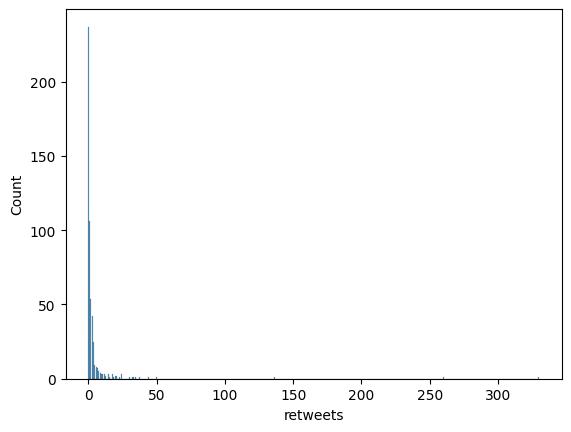

In [39]:
# Question 16: Now that we have addressed multi-collinearity and have
# standardized the features, we should examine and address skewness. Print
# the skewness score for the label 'retweets'. In addition, use the .histplot()
# object from the seaborn package to print out a histogram of 'retweets'.
import seaborn as sns
print(df['retweets'].skew())
sns.histplot(df['retweets'])

1.572517196447617


<Axes: xlabel='retweets', ylabel='Count'>

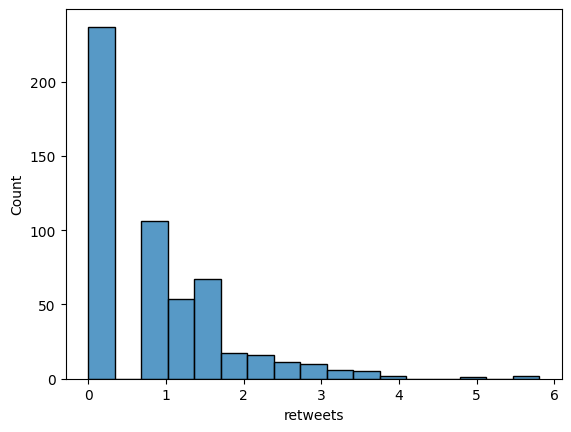

In [40]:
# Question 17: The skewness of retweets is clearly very extreme. However, we cannot 
# create a natural log transformation since there are zero values (ln(0) = undefined).
# Therefore, we need to +1 to all values before we calculate the natural log. 
# Thankfully, there is a numpy method for that: np.log1p(). Convert the 'retweets' 
# label to a natural log +1. Print out the new skewness and histogram.

df['retweets'] = np.log1p(df['retweets'])
print(df['retweets'].skew())
sns.histplot(df['retweets'])


In [41]:
# Question 18: Rerun the last MLR model using this new natural log +1 version
# of 'retweets'. Print out the results summary.

def mlr():
  y = df['retweets']
  X = df_dummies
  results = sm.OLS(y, X).fit()
  return results
results = mlr()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     16.77
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           5.94e-13
Time:                        21:47:56   Log-Likelihood:                -691.61
No. Observations:                 534   AIC:                             1393.
Df Residuals:                     529   BIC:                             1415.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
count_mentions            0          0  

/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
